In [ ]:
import cv2
import pywt
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
img = cv2.imread('./test_images/Tedy_Afro.jpeg')

In [ ]:

# If it's a color image, you can access each channel
# blue = img[50, 100, 0]
# green = img[50, 100, 1]
# red = img[50, 100, 2]

img.shape # returns 3d numpy array (height, width, and channel (3 for rgb or 1 for gray scale))


In [ ]:
plt.imshow(img)

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

In [ ]:
plt.imshow(gray)

In [ ]:
plt.imshow(gray, cmap='gray')

In [ ]:
face_cascade = cv2.CascadeClassifier('E:\\RoadMap\\ML Projects\\ML-Image-Classification\\opencv\\haarcascade\\haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('E:\\RoadMap\\ML Projects\\ML-Image-Classification\\opencv\\haarcascade\\haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(img, 1.3, 5)
eyes = eye_cascade.detectMultiScale(img)
faces

In [ ]:
(x,y,w,h) = faces[0]
x,y,w,h

In [ ]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2) #draw face
plt.imshow(face_img)

In [ ]:
        for (x, y, width, height) in faces:
            face_image = cv2.rectangle(img, (x, y), (x+width, y+height), (255, 0, 0), 1)
            face_region = img[y:y+height, x:x+width]
            eyes = eye_cascade.detectMultiScale(face_region)

In [ ]:
# for (x, y, w, h) in faces:
#     faces_image = cv2.rectangle(img,(x+y))
for (x, y, width, height) in faces:
    face_images = cv2.rectangle(img, (x,y), (x+width, y+height), (255, 0,0), 1) # (255, 0,0) <- is the color of rgb (blue), 2 <- the width of rectangle
    only_face_color = img[y:y+height, x:x+width]
    eyes = eye_cascade.detectMultiScale(only_face_color)
    for (x_eye, y_eye, width_eye, height_eye) in eyes:
        eyes_image = cv2.rectangle(only_face_color, (x_eye,y_eye), (x_eye+width_eye, y_eye+height_eye), (255, 0, 0), 1)
plt.imshow(eyes_image)

In [ ]:
#This function returns images if 2 eyes are visible
def get_images_with_2_eyes(path):
    img = cv2.imread(path)
    if img is not None:
        # gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(img, 1.3, 5)

        for (x, y, width, height) in faces:
            face_image = cv2.rectangle(img, (x, y), (x+width, y+height), (255, 0, 0), 1)
            face_region = img[y:y+height, x:x+width]
            eyes = eye_cascade.detectMultiScale(face_region)
            
            if len(eyes) >= 2:
                return face_region
            

In [ ]:
cropped_image = get_images_with_2_eyes('./test_images/Tedy_Afro.jpeg')
plt.imshow(cropped_image, cmap='gray')

In [ ]:
path_to_img_dataset = './datasets/'
path_to_cropped_img_datasets = './datasets/cropped/'

In [ ]:
import os
img_dir = []
for dirs in os.scandir(path_to_img_dataset):
    if dirs.is_dir():
        img_dir.append(dirs.path)
img_dir

In [ ]:
import shutil

#shutil used to easly tree directory
if os.path.exists(path_to_cropped_img_datasets):
    shutil.rmtree(path_to_cropped_img_datasets)
os.makedirs(path_to_cropped_img_datasets)

In [ ]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dir:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        # print(entry)
        print(entry)
        roi_color = get_images_with_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cropped_img_datasets + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            print("file_name:",cropped_file_name)
            print("celebrity_name", celebrity_name)
            cv2.imwrite(cropped_file_path, roi_color)
            print(cropped_file_path)

            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    

### Wavelet transform

**Compression:** Wavelet transforms can be used to compress images, retaining essential features while reducing file size. <br>
**Feature Extraction:** Key features can be extracted from images for tasks like classification and object detection.

In [ ]:
import numpy as np
import pywt
import cv2    

def toWavelet(img, mode='haar', level=1):
    imgArray = img
    #Datatype conversions
    #convert to grayscale
    imgArray = cv2.cvtColor( imgArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imgArray =  np.float32(imgArray)   
    imgArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imgArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imgArray_H=pywt.waverec2(coeffs_H, mode);
    imgArray_H *= 255;
    imgArray_H =  np.uint8(imgArray_H)
    return imgArray_H


In [ ]:
im_har = toWavelet(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [ ]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

In [53]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Abdu Kiar': 0, 'Addis Alem Getaneh': 1, 'Tedy Afro': 2}

### Combine the Wavelet and orginal image, these both can be usefull for model training

In [54]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = toWavelet(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])  

In [59]:
len(X[0])

4096

In [62]:
# reshaping X
X = np.array(X).reshape(len(X), 4096).astype(float)
X.shape

(427, 4096)

### Model Training

In [64]:
# we're gonna use SVM
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [74]:
# split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
pipe = Pipeline([('scalar', StandardScaler()), ('svc', SVC(kernel='rbf', C=10))])

pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.9651162790697675

In [77]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        25
           1       0.98      1.00      0.99        57
           2       0.67      0.50      0.57         4

    accuracy                           0.97        86
   macro avg       0.87      0.82      0.84        86
weighted avg       0.96      0.97      0.96        86



#### The use of GridSearch to select best fit model.

In [79]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [81]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [82]:
# grid search is used to hypertune parameters
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.932523,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.853581,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.909079,{'logisticregression__C': 1}


In [83]:
best_estimators['svm'].score(X_test,y_test)

0.9651162790697675

In [84]:
best_estimators['random_forest'].score(X_test,y_test)


0.9302325581395349

In [85]:
best_estimators['logistic_regression'].score(X_test,y_test)


0.9302325581395349

In [86]:
# our best classifier is SVM
best_clf = best_estimators['svm']


In [87]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[24,  0,  1],
       [ 0, 56,  1],
       [ 0,  1,  3]], dtype=int64)

Text(95.72222222222221, 0.5, 'Actual')

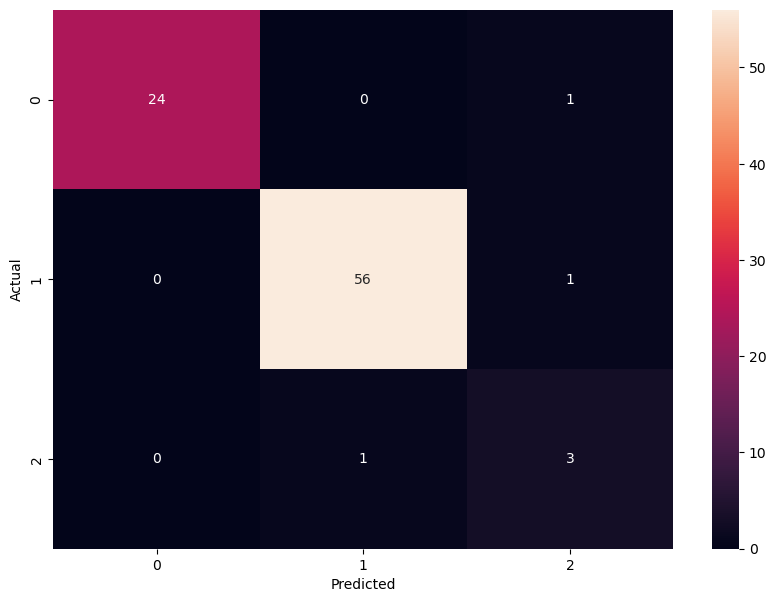

In [89]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

### Saving a Model

In [91]:
import joblib

joblib.dump(best_clf, "my_model.pkl")

['my_model.pkl']

### Saving class Dictionary

In [96]:
import json
with open('Class_dictionary.json', mode='w') as file:
    file.write(json.dumps(class_dict))